In [34]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import baostock as bs
import script.bsutil as bu
import script.utils as utils
import script.data as data
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
bs.login()

def get_stock():
    codes = pd.read_csv('stock_list.csv', header=None, names=['code'])
    for code in codes['code']:
        yield code
        
stock = get_stock()

# get all stock code
rs = bs.query_stock_basic()
data_list = []
while rs.error_code == '0' and rs.next():
    data_list.append(rs.get_row_data())
all_stocks = pd.DataFrame(data_list, columns=rs.fields)

bs.logout()

login success!
logout success!


           code code_name     ipoDate outDate type status
1244  sh.601799      星宇股份  2011-02-01            1      1
login success!
logout success!


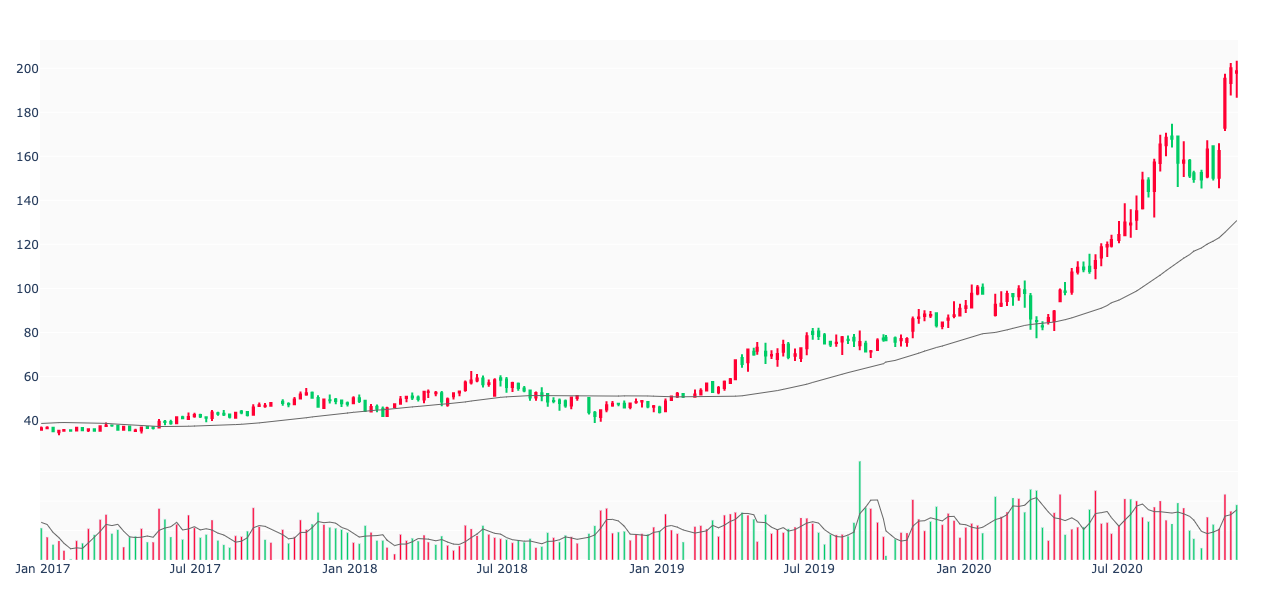

                                 营业收入           归属于母公司所有者的净利润
截止日期                                                         
2020-09-30   1,869,888,994.02 (33.8%)  315,878,542.48 (64.6%)
2020-06-30   1,620,429,033.77 (26.3%)  231,584,773.98 (37.0%)
2020-03-31  1,258,127,376.80 (-11.7%)  159,530,392.63 (-6.4%)
2019-12-31   1,986,721,627.70 (47.2%)  258,556,830.66 (51.0%)
2019-09-30    1,397,858,507.88 (9.7%)  191,888,344.50 (37.9%)
2019-06-30    1,282,939,298.69 (0.6%)  169,058,520.17 (-0.1%)
2019-03-31   1,424,278,982.26 (21.2%)  170,408,181.51 (30.2%)
2018-12-31    1,349,687,945.72 (8.1%)  171,250,794.98 (17.0%)
2018-09-30   1,273,909,809.78 (26.6%)  139,125,795.57 (43.9%)
2018-06-30   1,275,399,908.42 (23.0%)  169,231,348.40 (32.5%)
2018-03-31   1,175,069,616.99 (21.8%)  130,928,664.70 (32.0%)
2017-12-31   1,248,025,940.02 (17.4%)  146,393,436.54 (33.8%)


In [207]:
code = next(stock)

print(all_stocks[all_stocks['code'] == code])
bs.login()
df = bu.get_price_weekly(code)
bs.logout()
draw(df, 200, 40, 4, remove_missing=False)
incomeq = data.get_ISQ(code[3:])
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
df = incomeq_change[:12].set_index('截止日期')
print(df)